In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Import the data
df = pd.read_csv("https://static.bc-edx.com/ai/ail-v-1-0/m14/lesson_1/datasets/app-data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29332 entries, 0 to 29331
Data columns (total 87 columns):
 #   Column                                                                         Non-Null Count  Dtype
---  ------                                                                         --------------  -----
 0   android.permission.GET_ACCOUNTS                                                29332 non-null  int64
 1   com.sonyericsson.home.permission.BROADCAST_BADGE                               29332 non-null  int64
 2   android.permission.READ_PROFILE                                                29332 non-null  int64
 3   android.permission.MANAGE_ACCOUNTS                                             29332 non-null  int64
 4   android.permission.WRITE_SYNC_SETTINGS                                         29332 non-null  int64
 5   android.permission.READ_EXTERNAL_STORAGE                                       29332 non-null  int64
 6   android.permission.RECEIVE_SMS        

In [2]:
# Create an X and y variable
X = df.drop(columns=['Result'])
y = df['Result']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)

In [3]:
# Create a Random Forest model
classifier = RandomForestClassifier(random_state=13)

# Fit (train) or model using the training data
classifier.fit(X_train, y_train)

# Calculate the accuracy of the model on the testing data
classifier.score(X_test, y_test)

0.9693167871266876

In [4]:
# Calculate the accuracy of the model on the training data
classifier.score(X_train, y_train)

0.9826355743442884

In [5]:
# Create a loop to vary the max_depth parameter
# Make sure to record the train and test scores 
# for each pass.

# Depths should span from 1 up to 40 in steps of 2
depths = range(1, 40, 2)

# The scores dataframe will hold depths and scores
# to make plotting easy
scores = {'train': [], 'test': [], 'depth': []}

# Loop through each depth (this will take time to run)
for depth in depths:
    clf = RandomForestClassifier(max_depth=depth)
    clf.fit(X_train, y_train)

    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    scores['depth'].append(depth)
    scores['train'].append(train_score)
    scores['test'].append(test_score)

# Create a dataframe from the scores dictionary and
# set the index to depth
scores_df = pd.DataFrame(scores).set_index('depth')

scores_df.head()

,train,test
depth,,
1,0.898904,0.893222
3,0.913132,0.909860
5,0.936679,0.933452
7,0.946088,0.942043
9,0.961135,0.955953


<Axes: xlabel='depth'>

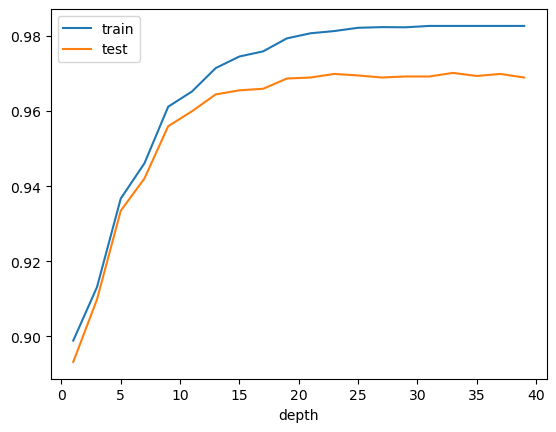

In [6]:
# Plot the scores dataframe with the plot method
scores_df.plot()